In [1]:
import numpy as np
import matplotlib.pyplot as plt

# 4 символа QPSK (1,1), (-1,1), (-1,-1), (1,-1)
iq_points = np.array([
    [1, 1],
    [-1, 1],
    [-1, -1],
    [1, -1]
]) * (np.sqrt(2) / 2)  # нормируем на круг

# Построим их как фазовые вектора
phases = np.arctan2(iq_points[:,1], iq_points[:,0])  # atan2(Q, I)

print("Фазы каждого QPSK-символа (в радианах):", phases)


Фазы каждого QPSK-символа (в радианах): [ 0.78539816  2.35619449 -2.35619449 -0.78539816]


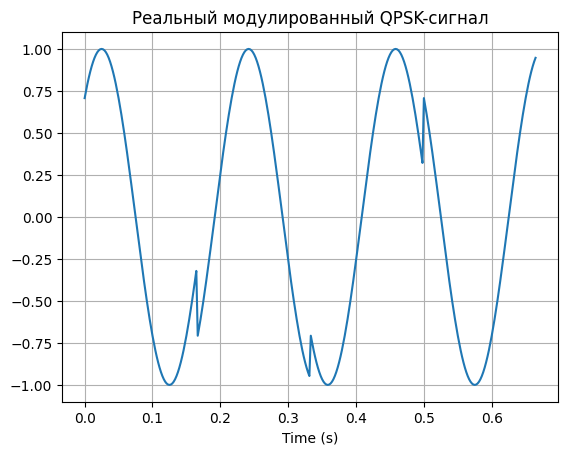

In [2]:
# Один символ длится N сэмплов
samples_per_symbol = 80
fc = 5  # Гц
fs = 480  # Гц
t_symbol = np.arange(samples_per_symbol) / fs

# I и Q постоянны на интервале символа
def modulate_symbol(i, q):
    i_wave = i * np.cos(2 * np.pi * fc * t_symbol)
    q_wave = q * np.sin(2 * np.pi * fc * t_symbol)
    return i_wave + q_wave  # реальный QPSK сигнал

# Модулируем последовательность из 4 символов
modulated = np.concatenate([
    modulate_symbol(i, q) for (i, q) in iq_points
])

# Время всего сигнала
t = np.arange(len(modulated)) / fs

plt.plot(t, modulated)
plt.title("Реальный модулированный QPSK-сигнал")
plt.xlabel("Time (s)")
plt.grid(True)
plt.show()


In [3]:
# Умножаем на несущие — получаем суррогат I и Q
i_demod = modulated * np.cos(2 * np.pi * fc * t)
q_demod = modulated * np.sin(2 * np.pi * fc * t)

# Lowpass filter: здесь просто усреднение по символу
i_recovered = []
q_recovered = []
for i in range(0, len(t), samples_per_symbol):
    i_chunk = i_demod[i:i+samples_per_symbol]
    q_chunk = q_demod[i:i+samples_per_symbol]
    i_recovered.append(np.mean(i_chunk))
    q_recovered.append(np.mean(q_chunk))

i_recovered = np.array(i_recovered)
q_recovered = np.array(q_recovered)


Восстановленные фазы: [0.84905567 1.22323984 1.89625322 2.2704374 ]


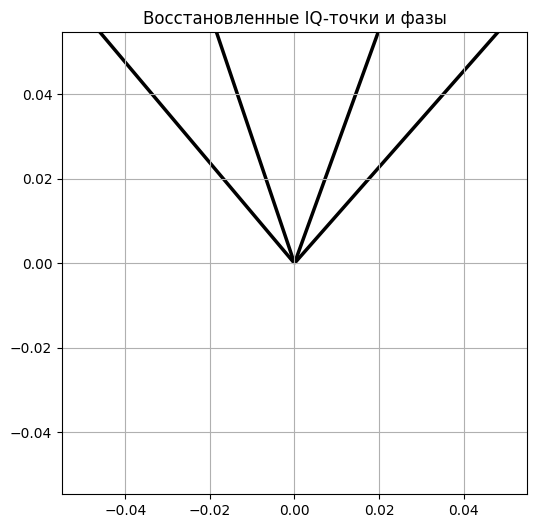

In [4]:
recovered_phase = np.arctan2(q_recovered, i_recovered)

print("Восстановленные фазы:", recovered_phase)

plt.figure(figsize=(6,6))
plt.quiver(np.zeros_like(i_recovered), np.zeros_like(q_recovered), i_recovered, q_recovered, angles='xy', scale_units='xy', scale=1)
plt.title("Восстановленные IQ-точки и фазы")
plt.grid(True)
plt.axis('equal')
plt.show()
